# **E-Commerce Customer Churn**

Created by: Hafiz Minhajuel

**Table of content :**

1. Business Problem
2. Data Understanding
3. Exploratory Data Analysis
4. Data Preparation
5. Modeling
6. Conclusion and Recommendation
---

# **1. Business Problem**

**Context**

Tim Marketing dari sebuah perusahaan E-Commerce X ingin melakukan evaluasi terhadap terjadinya "Customer Churn", yaitu pelanggan yang berhenti menggunakan layanan atau membeli produk di platform E-Commerce X. Jika dibiarkan, customer churn akan menyebabkan E-Commerce X kehilangan pelanggannya, yang berarti kehilangan pendapatan dan harus mencari pelanggan baru. Hal ini tentu akan menyebabkan kerugian besar bagi E-Commerce X, sebab **cost untuk mencari pelanggan yang baru memakan biaya lima kali lebih mahal daripada menjaga pelanggan yang sudah ada** [(Gallo, 2014)](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers). Maka dari itu pentingnya untuk menjaga customer agar tetap loyal.

**Problem Statement**

"Customer Churn" merupakan masalah yang signifikan dalam bisnis. Salah satu strategi yang dapat diterapkan oleh E-Commerce X adalah melakukan pendekatan melalui promosi khusus bagi pelanggan E-Commerce X. Namun jika promosi diberikan kepada semua pelanggan akan tidak efisien apabila yang menerima promosi tersebut adalah pelanggan yang ternyata tidak berpotensi churn, sebab tanpa diberi promosi pun mereka tetap akan menggunakan layanan. Maka itu promosi khusus harus diprioritaskan kepada pelanggan yang berpotensi akan churn. 

**Goals**

Berdasarkan permasalahan sebelumnya, E-Commerce X perlu memprediksi pelanggan yang berpotensi churn. Dengan mengetahui pelanggan mana yang berpotensi churn beserta faktor apa yang menyebabkan pelanggan churn, perusahaan dapat membuat strategi yang tepat untuk mempertahankan pelanggan dengan biaya yang lebih efisien.

**Pendekatan Analitis**

Pendekatan analitis adalah membuat, mengevaluasi, dan mengimplementasikan model *machine learning* klasifikasi yang dapat memprediksi apakah pelanggan akan *churn* atau tidak berdasarkan riwayat data yang ada. 

Target:   
0 : Pelanggan tidak *churn*  
1 : Pelanggan *churn*


**Metrik Evaluasi**

- **True Positive (TP)**: Pelanggan diprediksi churn dan kenyataannya churn.
- **False Positive (FP)**: Pelanggan diprediksi churn, namun kenyataannya tidak churn.
- **True Negative (TN)**: Pelanggan diprediksi tidak churn dan kenyataannya tidak churn. 
- **False Negative (FN)**: Pelanggan diprediksi tidak churn, namun kenyataannya churn.

Dalam melakukan prediksi, kesalahan yang dapat terjadi yaitu:

**Type 1 error** : False Positive  
Konsekuensi: Biaya promosi terbuang percuma

**Type 2 error** : False Negative  
Konsekuensi: Kehilangan pelanggan 

Berdasarkan konsekuensinya, model yang dibuat akan lebih **menekankan untuk dapat mengurangi False Negative**, sebab konsekuensi kehilangan pelanggan (False Negative) lebih merugikan karena cost untuk mencari pelanggan baru untuk menggantikan pelanggan yang *churn* akan memakan biaya lima kali lebih mahal. 

Namun promosi untuk menjaga pelanggan agar tidak churn harus dilakukan dengan tepat agar biaya promosi tidak terbuang percuma (False Positive). Maka itu metric yang digunakan adalah **F2 Score**. F2 score dapat digunakan untuk mengevaluasi performa model klasifikasi di mana kesalahan false negative lebih penting untuk dihindari daripada false positive.

---
# **2. Data Understanding**

Features
- **Tenure**: Masa pelanggan menggunakan layanan
- **WarehouseToHome**: Jarak antara gudang ke rumah pelanggan
- **NumberOfDeviceRegistered**: Jumlah perangkat yang terdaftar pada satu pelanggan

Customer.
- **PreferedOrderCat**: Kategori yang disukai pelanggan
- **SatisfactionScore**: Skor kepuasan pelanggan
- **MaritalStatus**: Status pernikahan pelanggan
- **NumberOfAddress**: Jumlah alamat yang terdaftar pada satu pelanggan
- **Complaint**: Komplain pelanggan. 0-tidak komplain, 1-komplain
- **DaySinceLastOrder**: Hari sejak pesanan terakhir
- **CashbackAmount**: Rata-rata cashback yang diterima satu pelanggan
- **Churn**: 0-tidak churn, 1-churn

### **Import Library**

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE, RFECV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler, KBinsDiscretizer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, fbeta_score, make_scorer, roc_auc_score, f1_score, accuracy_score, recall_score, precision_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

# Imbalance Dataset
import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, KMeansSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN,SMOTETomek

# Shap
import shap

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Saving Model
import pickle

In [2]:
# Import Dataset
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### **Data Structure**

In [3]:
df.shape, df.columns

((3941, 11),
 Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
        'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
        'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
        'Churn'],
       dtype='object'))

<div class="alert alert-block alert-info">
Data terdiri dari 3941 baris dan 11 kolom
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [5]:
# Statistik deskriptif
pd.options.display.max_columns = None
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [6]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


In [7]:
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
cat_features

['PreferedOrderCat', 'MaritalStatus']

<div class="alert alert-block alert-info">
Terdapat 2 kolom kategorikal: 'PreferedOrderCat', 'MaritalStatus'
</div>

In [8]:
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Churn']))]
num_features

['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

<div class="alert alert-block alert-info">
terdapat 8 kolom numerikal: 'Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount'
</div>

> ### Insight
- Terdapat 3941 baris dan 11 kolom pada dataset
- Tipe data setiap kolom sesuai dengan semestinya.
- Data numerik dengan variabel quantitave: **Tenure**, **WarehousetoHome**, **NumberofDevice**, **NumberofAddress**, **DaySinceLastOrder**, dan **CashbackAmount**. 
- Data numerik qualitative yang menunjukkan yes or no: **complain**, dan **churn**. 
- Data numerik qualitative scale ordinal: **satisfaction score**. 
- Data kategorik: **PreferedOrderCat** dan **Marital**. 
- Pada kolom **Tenure**, **WarehouseToHome**, dan **DaySinceLastOrder** yang berisi data numerik terdapat missing value.
- Pada kolom **PreferedOrderCat** terdapat data yang tidak konsisten, seperti *Mobile* dan *Mobile Phone* yang bermakna sama. sehingga akan kita gabungkan.

---
# **3. Exploratory Data Analysis**

### **Feature Correlation**

Pertama-tama kita coba cek korelasi antar fitur pada data. Hal ini ditujukan untuk mengetahui apakah ada fitur yang saling berkorelasi satu sama lain. Apabila ada, maka kita perlu drop salah satu fitur dengan korelasi tinggi tersebut. Hal ini dikarenakan fitur tersebut dapat mempengaruhi performa model akibat karakteristik data yang mirip/menjadi noise. 

In [9]:
df.corr('spearman',numeric_only=True).style.background_gradient(cmap='Blues')

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
Tenure,1.000000,-0.053618,-0.017633,-0.048987,0.277656,-0.041638,0.198661,0.431859,-0.420157
WarehouseToHome,-0.053618,1.000000,0.026200,0.023106,0.023512,0.039878,0.025546,0.023663,0.074552
NumberOfDeviceRegistered,-0.017633,0.026200,1.000000,0.000564,0.124153,0.013035,0.035833,0.203806,0.103913
SatisfactionScore,-0.048987,0.023106,0.000564,1.000000,0.041714,-0.033045,0.019757,-0.009212,0.106293
NumberOfAddress,0.277656,0.023512,0.124153,0.041714,1.000000,0.008248,-0.070876,0.259277,0.025071
Complain,-0.041638,0.039878,0.013035,-0.033045,0.008248,1.000000,-0.048045,0.018085,0.261450
DaySinceLastOrder,0.198661,0.025546,0.035833,0.019757,-0.070876,-0.048045,1.000000,0.375708,-0.188466
CashbackAmount,0.431859,0.023663,0.203806,-0.009212,0.259277,0.018085,0.375708,1.000000,-0.182730
Churn,-0.420157,0.074552,0.103913,0.106293,0.025071,0.261450,-0.188466,-0.182730,1.000000


> ### **Insight**
- antar feature tidak ada yang memiliki hubungan yang kuat 
- seluruh feature memiliki nilai correlation < 0.5

### **Data Distribution**

In [10]:
df.value_counts('Churn')

Churn
0    3267
1    674 
Name: count, dtype: int64

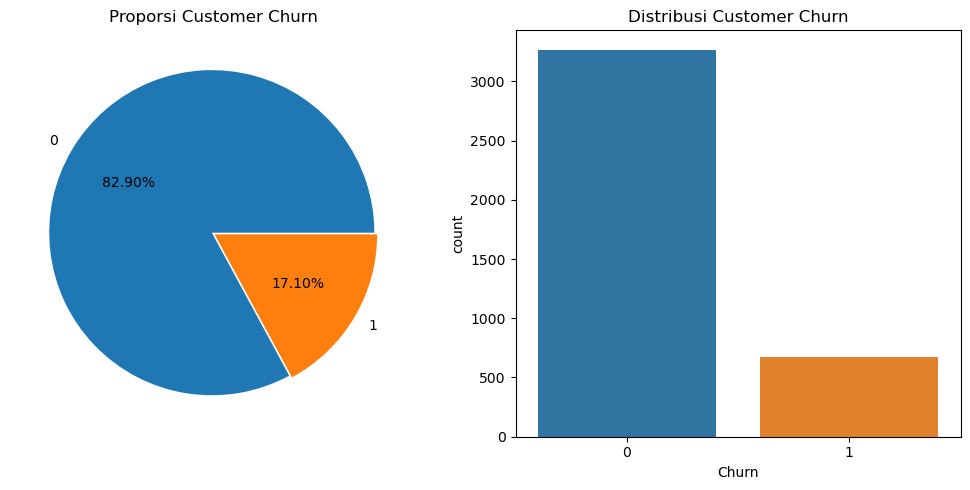

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(), labels=['0','1'],autopct='%.2f%%',explode=(0.01,0.01))
plt.title('Proporsi Customer Churn')
plt.subplot(1,2,2)
sns.countplot(x=df['Churn'])
plt.title('Distribusi Customer Churn')
plt.tight_layout()
plt.show() 

> ### Insight
- Target (churn) pada dataset ini masih berdistribusi timpang atau *Imbalance*. Kelas 0 (tidak churn) lebih besar dibanding kelas 1 (churn)
- tidak churn: 83.70%, churn: 16.30%.
- Perlu dilakukan penanganan terhadap Imbalance karena akan berdampak pada performa yang buruk untuk memprediksi kelas minoritas.

#### Berdasarkan variabel numerik - kontinu

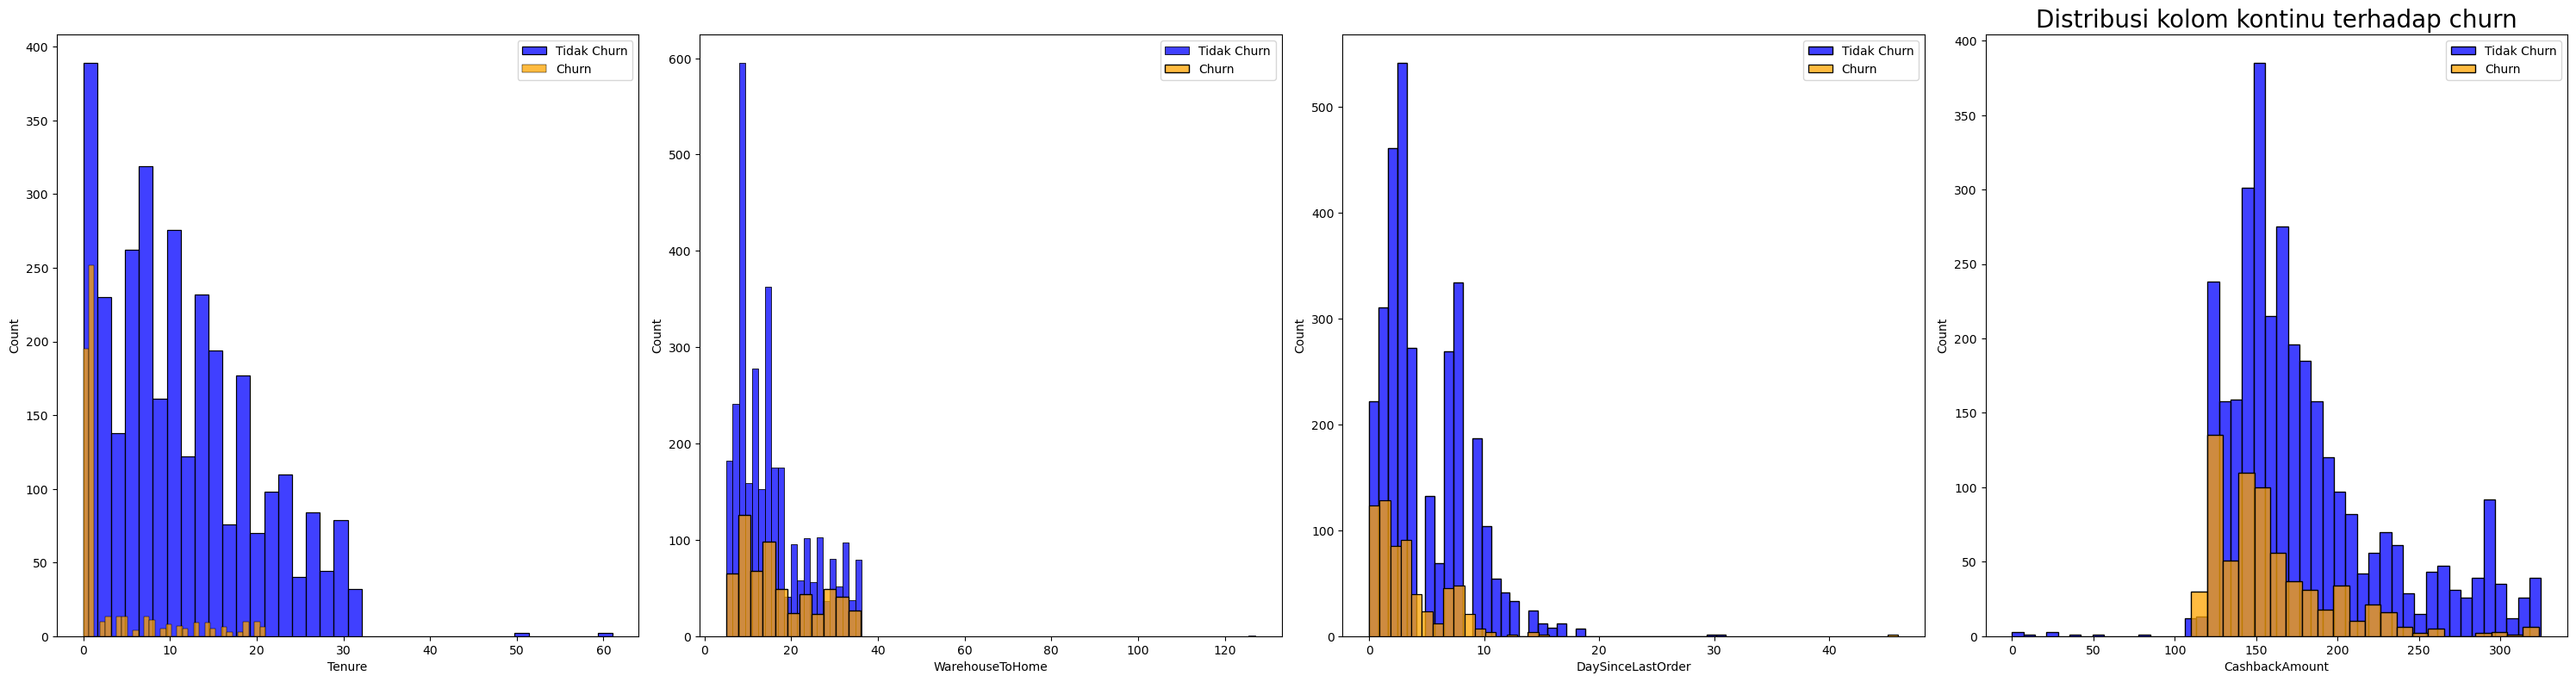

In [12]:
# Distribusi pada kolom kontinu terhadap churn
kontinu= ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
a=1
plt.figure(figsize=(30,30))
for i in kontinu:
    plt.subplot(4,4,a)
    sns.histplot(x=df[df['Churn']==0][i],color='blue')
    sns.histplot(x=df[df['Churn']==1][i],color='orange')
    plt.legend(labels=['Tidak Churn','Churn'])
    plt.tight_layout()
    a+=1
plt.title('Distribusi kolom kontinu terhadap churn', fontsize=20)
plt.show()

>### **Insight**

- Tenure: Bulan awal pelanggan menggunakan platform (0-1) menjadi bulan tertinggi terjadinya churn.
- WarehouseToHome: Data pelanggan churn terdistribusi hampir rata. Namun selisih pelanggan churn dan tidak churn diatas 20KM sangat kecil. Ini berarti semakin jauh jarak gudang dengan rumah pelanggan, maka ada potensi pelanggan churn. 
- DaySinceLastOrder: Distribusi pada pelanggan churn dan tidak churn hampir sama.
- CashbackAmount: pelanggan churn paling tinggi berada di antara 100-150, dan akan dianalisa lebih lanjut faktornya. 

#### Berdasarkan variabel numerik Quantitatif diskrit dan numerik Qualitatif

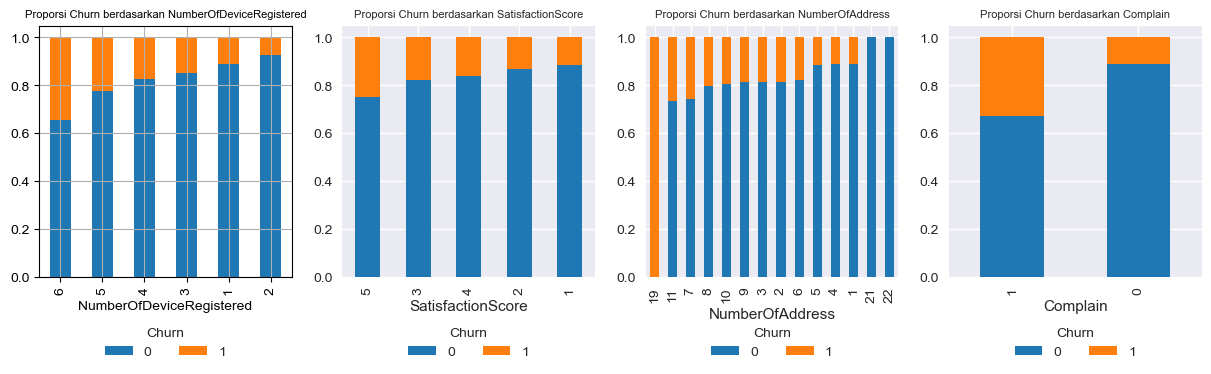

In [13]:
# Visualisasi proporsi churn berdasarkan variabel
kolomnum = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain']
a=1
plt.figure(figsize=(15,15))
for i in kolomnum: 
    ax = plt.subplot(4,4,a)
    plt.style.use('seaborn')
    plt.title(f'Proporsi Churn berdasarkan {i}', fontsize=8)
    pd.crosstab(df[i],df['Churn'],normalize='index').sort_values(by=1, ascending=False).plot(color=['tab:blue',"tab:orange"], kind='bar', stacked=True,ax=ax)
    plt.legend(title='Churn', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    a+=1
    plt.tight_layout
plt.show()

#### Berdasarkan variabel kategori 

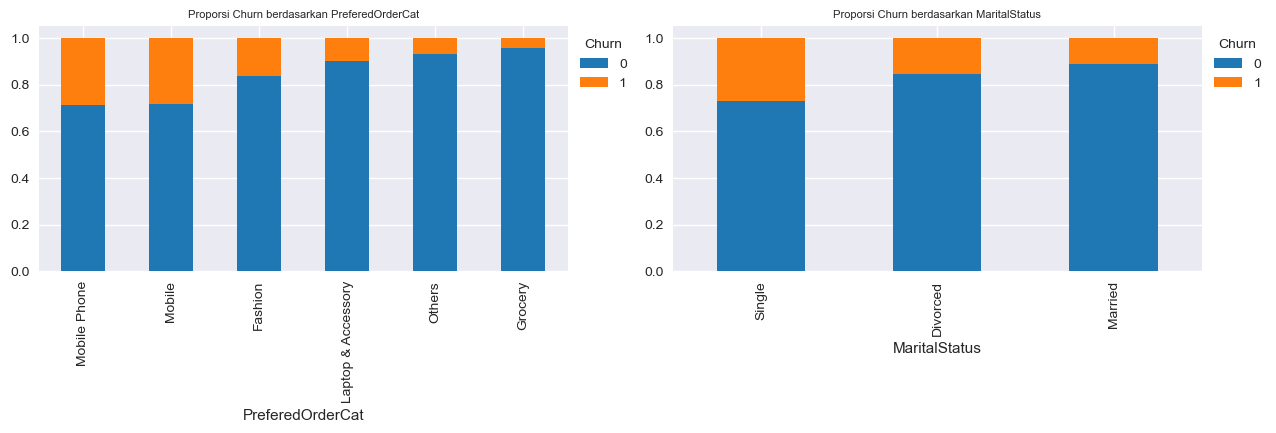

In [14]:
# Visualisasi proporsi churn berdasarkan variabel
kat = ['PreferedOrderCat', 'MaritalStatus']
a=1
plt.figure(figsize=(15,7))
for i in kat: 
    ax = plt.subplot(2,2,a)
    plt.style.use('seaborn')
    plt.title(f'Proporsi Churn berdasarkan {i}', fontsize=8)
    pd.crosstab(df[i],df['Churn'],normalize='index').sort_values(by=1, ascending=False).plot(color=['tab:blue',"tab:orange"], kind='bar', stacked=True,ax=ax)
    plt.legend(title='Churn', loc='upper left', bbox_to_anchor=(1, 1))
    a+=1
    plt.tight_layout
plt.show()

> ### **Insight**
Jika dilihat dari proporsi tertinggi, pelangan yang cenderung untuk churn: 

- NumberOfDeviceRegistered: Pelanggan yang mendaftarkan lebih dari 2 perangkat
- NumberOfAddress: Cukup sulit untuk melihat pelangan churn dari jumlah alamat pelanggan karena tidak berpola
- SatisfactionScore: Pelanggan yang memberikan nilai kepuasan diatas 3
- Complain: Pelanggan yang melakukan complain 
- PreferedOrderCat: Memiliki preferensi order Mobile Phone
- MaritalStatus: Berstatus Single

***
# **4. Data Preparation**

Tahapan selanjutnya sebelum pembuatan model adalah mempersiapkan dataset dengan menangani anomali hingga proses data pre-processing.

## **4.1 Problematic Data**

### **Duplicated Data**

In [15]:
df.duplicated().sum()

671

In [16]:
duplicate_data = df[df.duplicated(subset=df.columns, keep=False)]
duplicate_data.sort_values(by='CashbackAmount')

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3490,0.0,15.0,3,Mobile Phone,1,Single,2,0,0.0,110.81,1
2010,0.0,15.0,3,Mobile Phone,1,Single,2,0,0.0,110.81,1
95,0.0,30.0,1,Mobile Phone,5,Single,2,0,0.0,110.91,1
3166,0.0,30.0,1,Mobile Phone,5,Single,2,0,0.0,110.91,1
178,NaN,13.0,3,Mobile Phone,3,Married,2,0,0.0,112.74,0
...,...,...,...,...,...,...,...,...,...,...,...
3798,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
1669,14.0,14.0,4,Others,4,Single,3,0,9.0,323.33,0
296,14.0,14.0,4,Others,4,Single,3,0,9.0,323.33,0
2806,15.0,14.0,6,Others,3,Married,3,0,11.0,324.73,0


<div class="alert alert-block alert-info">
terdapat 671 data duplikat
</div>

### **Missing Value**

In [17]:
df.isnull().sum().sort_values(ascending=False).head(), (df.isna().sum()/df.shape[0]*100).sort_values(ascending=False).round(2).head()

(DaySinceLastOrder           213
 Tenure                      194
 WarehouseToHome             169
 NumberOfDeviceRegistered    0  
 PreferedOrderCat            0  
 dtype: int64,
 DaySinceLastOrder           5.40
 Tenure                      4.92
 WarehouseToHome             4.29
 NumberOfDeviceRegistered    0.00
 PreferedOrderCat            0.00
 dtype: float64)

<div class="alert alert-block alert-info">
Terdapat Missing Value pada: DaySinceLastOrder (5.4%), Tenure (4.92%), WarehouseToHome (4.29%)
</div>

<Axes: >

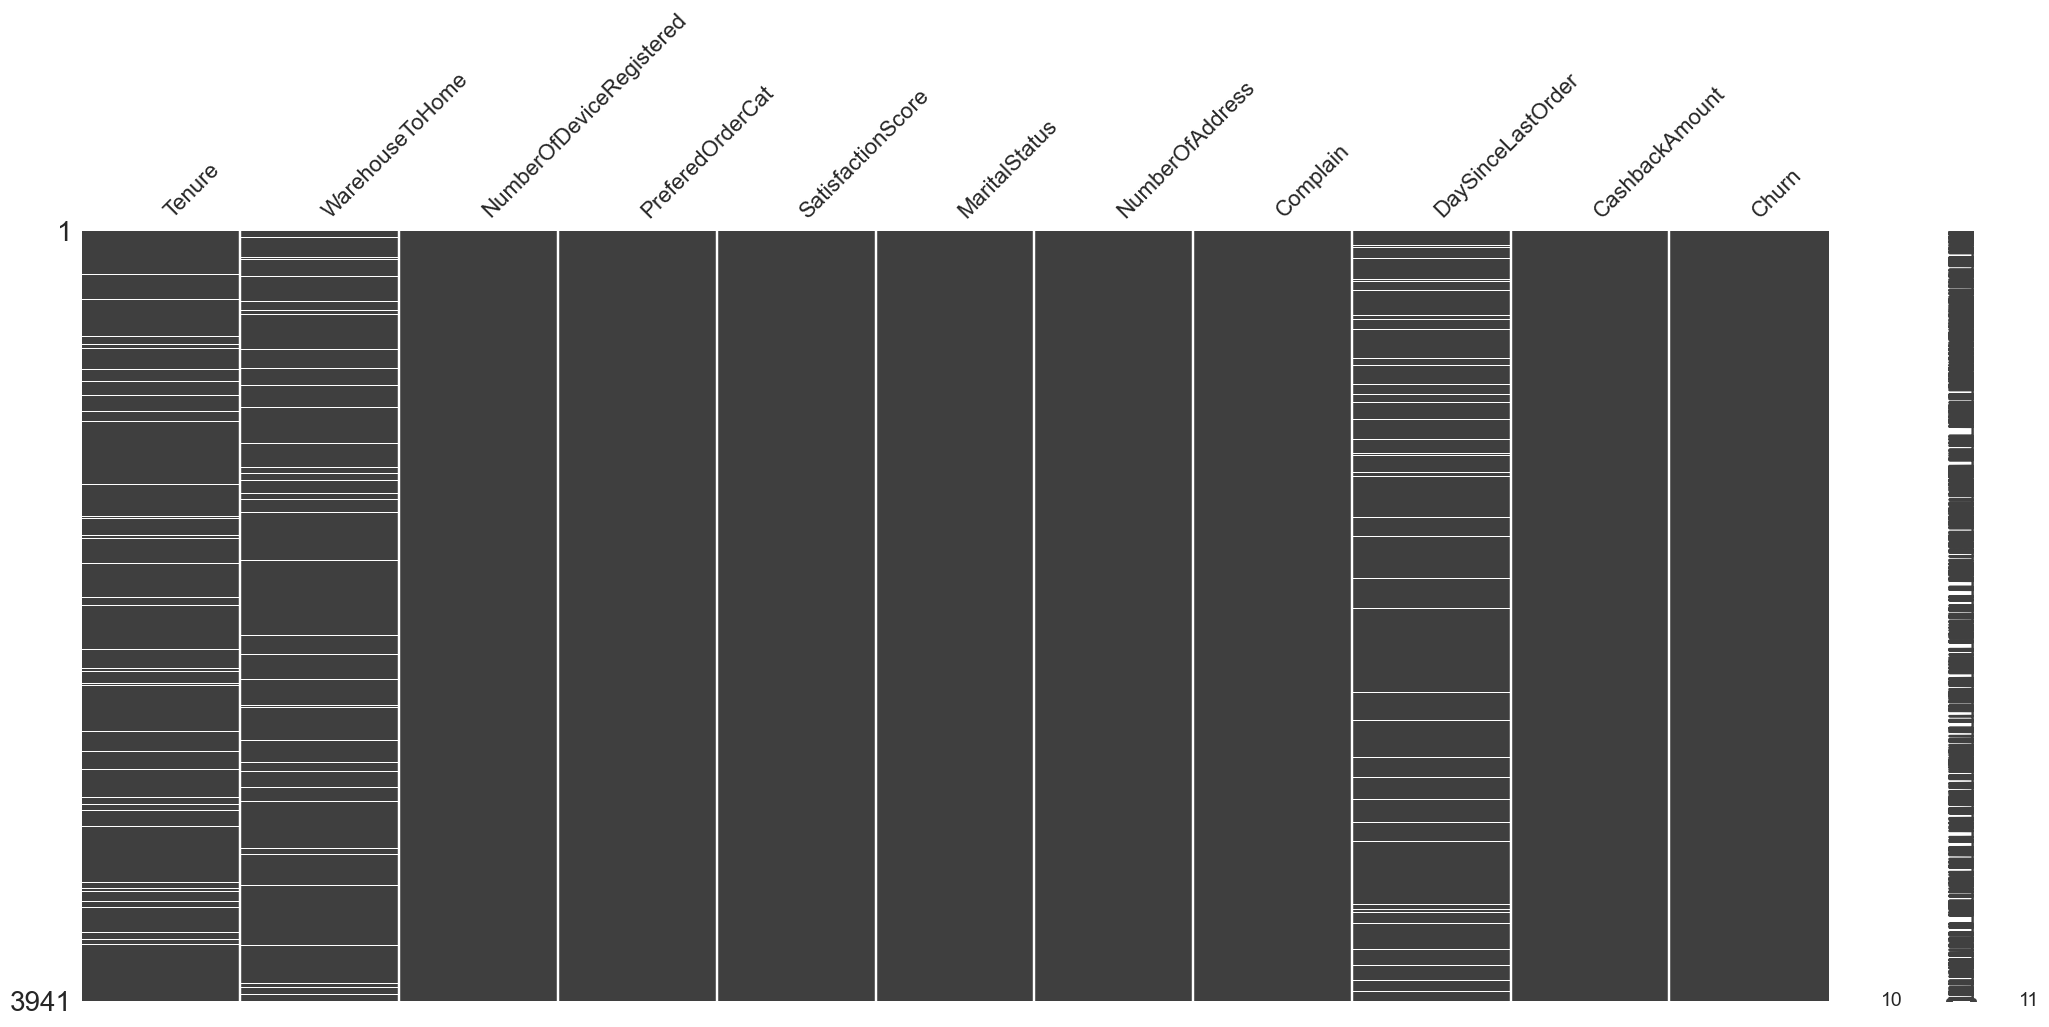

In [18]:
missingno.matrix(df)

<div class="alert alert-block alert-info">
Missing Value pada setiap kolom cukup acak
</div>

> ### Insight
- Terlihat bahwa missing value/data yang hilang pada setiap kolom memiliki pola yang cukup acak. 
- menghapus data dengan missing value merupakan pilihan yang kurang bijak dan dapat beresiko menurunkan akurasi hasil karena keterbatasan jumlah data. Oleh karena itu, tindakan yang akan diambil adalah dengan melakukan impute data terhadap setiap data missing value.
- Pengisian missing value pada kolom **Tenure**, **WarehouseToHome**, dan **DaySinceLastOrder** perlu menggunakan metode yang lebih advance, tidak menggunakan metode konvensional seperti mean atau median karena jumlah missing value yang cukup besar. Oleh karena itu impute missing value akan dilakukan dengan model machnine learning.

### **Outlier**

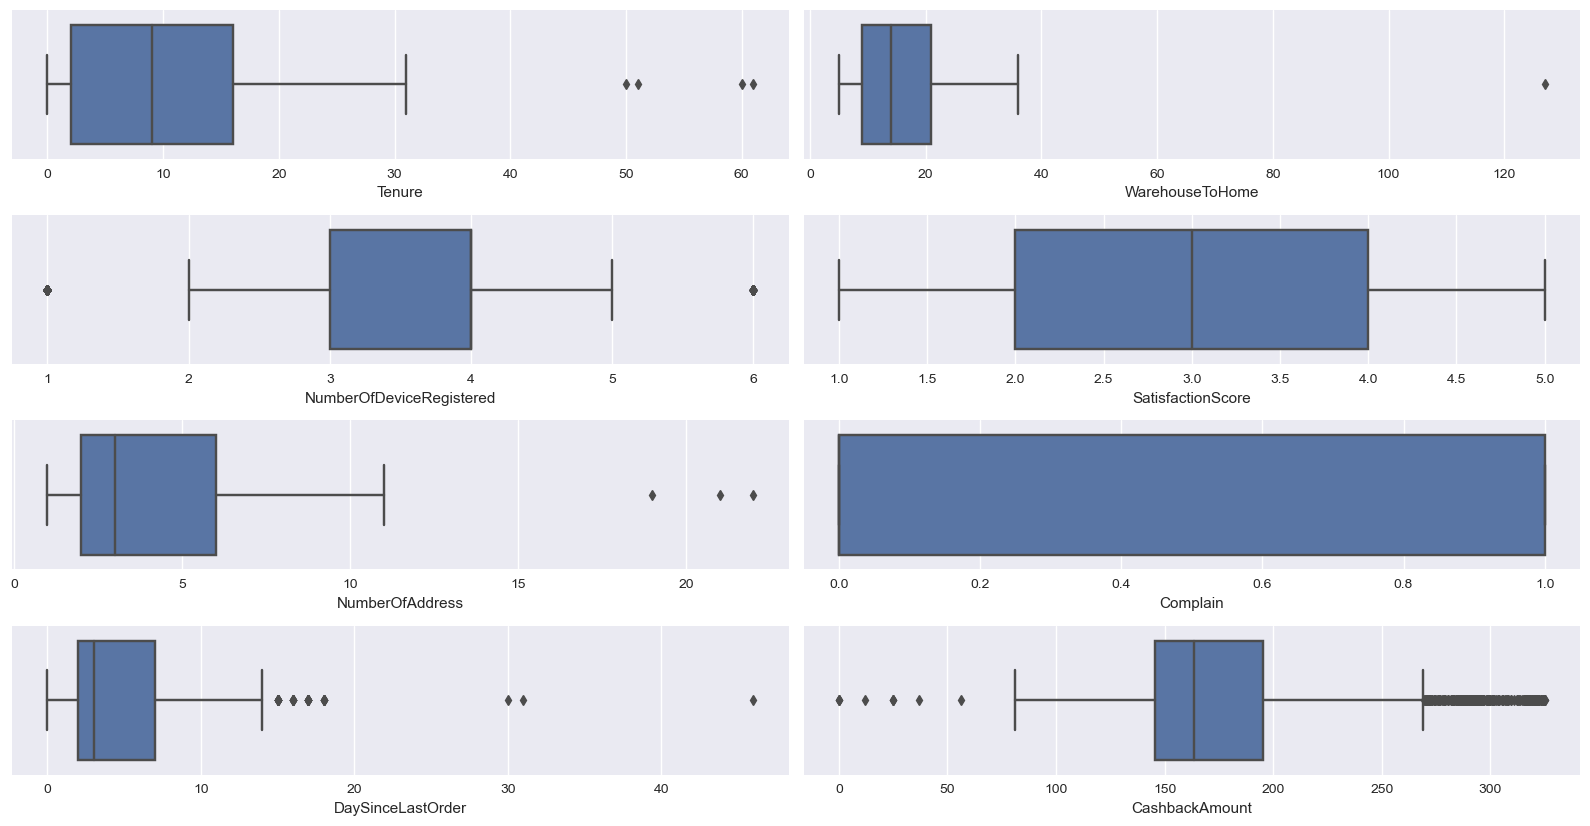

In [19]:
col_names = num_features
plotnumber = 1
plt.figure(figsize=(16,10))

for kolom in col_names:
    plt.subplot(5,2, plotnumber)
    sns.boxplot(data=df, x=kolom)
    plt.tight_layout()

    plotnumber += 1

> ### Insight
- Ada beberapa kolom numerik yang memiliki outlier
- Outlier pada dataset terlihat masuk akal pada kasus e-commerce. Seperti contoh pada kolom DaySinceLastOrder terdapat data terakhir pemesanan >40 hari. Hal ini mungkin saja terjadi. Maka itu, data-data yang teridentifikasi outliers akan dipertahankan dalam dataset sebagai data yang akan digunakan dalam proses pembuatan model.

### **Handling Inconsistent Data**

In [20]:
#Mengubah PreferedOrderCat dari Mobile menjadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

In [21]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone          1446
Fashion               585 
Grocery               273 
Others                179 
Name: count, dtype: int64

<div class="alert alert-block alert-info">
Kategori Mobile sudah digabung dengan Mobile Phone
</div>

### **Handling Duplicated Data**

In [22]:
df.drop_duplicates(keep='first',inplace=True)
df=df.reset_index().drop(columns = {'index'})

In [23]:
df.duplicated().sum()

0

<div class="alert alert-block alert-info">
Data duplikat sudah diatasi
</div>

## **4.2 Data Splitting**

Setelah melakukan pengecekan dan penanganan pada problematic data, kita akan split data untuk melakukan proses data pre-processing.

In [24]:
# feature
X = df.drop(['Churn'], axis=1) 

# target
y = df['Churn'] 

Dari dataset ini, kita ambil 80% sebagai training dataset dan 20% sebagai test dataset.

In [25]:
# train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) 
display(X_train.shape, X_test.shape)

(2615, 10)

(654, 10)

## **4.3 Data Preprocessing & Feature Engineering**

Setelah melakukan data cleaning dan data splitting, ada beberapa tahap preprocessing dan feature engineering yang akan dilakukan:

**Handling Missing Value**

- Kolom yang terdapat missing value (**Tenure, WarehouseToHome, dan DaySinceLastOrder**) tidak berdistribusi normal dan bertipe numerik. Metode yang tepat adalah dengan menggunakan KNN Imputer karena dapat mempertahankan nilai dan variabilitas dataset.

**Encoding**

- Algoritma machine learning membutuhkan data dalam bentuk numerik untuk memahami data tersebut. Untuk mengkonversi data kategorik menjadi data numerik perlu dilakukan **Encoding**.
- Data pada kolom **MaritalStatus** dan **PreferedOrderCat** bertipe kategorik dan tidak tergolong bertingkat, sehingga akan di konversi menggunakan **One Hot Encoding** 

**Scaling**

- Scaling bertujuan untuk melakukan transformasi data numerik agar antar variable memiliki skala yang sama.
- Kolom **Complain** memiliki 2 unique data yang sudah berbentuk 0 dan 1, sehingga tidak diperlukan proses scaling.
- Kolom **Tenure, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, DaySinceLastOrder, CashbackAmount** akan dilakukan proses Scaling. 
- Proses scalling akan menggunakan **Robust Scaler** dengan pertimbangan data terdistribusi secara skewed dan ada sejumlah outlier yang dipertahankan dalam dataset. **Robust Scaler** sangat cocok digunakan untuk data yang memiliki outlier karena **Robust Scaler** mentransformasi data berdasarkan Interquartile Range

**Class Weight**

Ada beberapa metode yang bisa dilakukan untuk mengatasi data imbalanced:
- penggunaan metode Oversampling maupun metode yang lebih advanced seperti SMOTEENC atau ADASYN
- penggunaan class weight = 'balanced'

Referensi:
1. [analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/)
2. [medium.com/grabngoinfo](https://medium.com/grabngoinfo/balanced-weights-for-imbalanced-classification-465f0e13c5ad)

In [26]:
#Membuat pipeline
impute = Pipeline([
    ('KNN Imputer', KNNImputer(n_neighbors=10)),
    ('robust', RobustScaler()),
])

In [27]:
# Membuat kolom Transformasi
transformer = ColumnTransformer([
    ('One Hot Encoding', OneHotEncoder(drop='first', handle_unknown='ignore'), ['PreferedOrderCat', 'MaritalStatus']),
    ('Impute Robust', impute, ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore']),
], remainder='passthrough')

transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot Encoding',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('Impute Robust',
                                 Pipeline(steps=[('KNN Imputer',
                                                  KNNImputer(n_neighbors=10)),
                                                 ('robust', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount',
                                  'SatisfactionScore'])])

In [28]:
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
testing.sample()

,One Hot Encoding__PreferedOrderCat_Grocery,One Hot Encoding__PreferedOrderCat_Laptop & Accessory,One Hot Encoding__PreferedOrderCat_Mobile Phone,One Hot Encoding__PreferedOrderCat_Others,One Hot Encoding__MaritalStatus_Married,One Hot Encoding__MaritalStatus_Single,Impute Robust__Tenure,Impute Robust__WarehouseToHome,Impute Robust__NumberOfDeviceRegistered,Impute Robust__NumberOfAddress,Impute Robust__DaySinceLastOrder,Impute Robust__CashbackAmount,Impute Robust__SatisfactionScore,remainder__Complain
1988,0.0,0.0,0.0,0.0,0.0,1.0,-0.307692,1.538462,1.0,0.25,0.66,1.0026,0.5,1.0


***
# **5. Modeling**

Kita akan menguji beberap list model seperti: 
1. Logistic Regression
2. KNN
3. Decision Tree
4. Random Forest
5. Gradient Boost
6. Ada Boost
7. Xtreme Gradient Boost
8. Light Gradient Boost
9. SVC

Ada beberapa variasi yang akan kita coba untuk menemukan model terbaik, seperti:
- Class Weight : Balanced
- Feature Selection
- Resampling

Semua model akan dilakukan Cross Validation.

## **5.1 Perbandingan penggunaan Class Weight**

Saat ini kita mencoba pakai Class Weight = Balanced dalam parameter model. Penggunaan parameter class_weight untuk mengatasi masalah ketidakseimbangan dalam dataset. Mengingat dataset ini skewed terhadap kelompok churn, maka dapat menyebabkan model machine learning cenderung mengklasifikasikan kelompok mayoritas dengan lebih baik daripada kelompok minoritas.

In [29]:
# metrics
f2_score = make_scorer(fbeta_score, beta=2)

### **Model Benchmark: Tanpa Class Weight**

In [30]:
logreg = LogisticRegression(random_state=1)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=1) 
rf = RandomForestClassifier(random_state=1) 
ada = AdaBoostClassifier(tree, random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
lgb = LGBMClassifier(random_state=1, verbosity=-1)
svc = SVC(random_state=1)

In [31]:
models = [logreg,knn,tree,rf,ada,gbc,xgb,lgb,svc]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM', 'SVC'],
                'mean f2 score train':rata,
                'sdev':std,
}).set_index('model').sort_values(by='mean f2 score train',ascending=False)

,mean f2 score train,sdev
model,,
XGBoost,0.666004,0.043932
Decision Tree,0.665262,0.040457
LightGBM,0.664667,0.055041
AdaBoost,0.660777,0.037490
GBoost,0.599559,0.028455
Random Forest,0.587563,0.024606
Logistic Regression,0.490265,0.038641
SVC,0.419291,0.040550
KNN,0.407392,0.036661


### **Model Benchmark: Dengan Class Weight**

In [32]:
logreg = LogisticRegression(random_state=1, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=1, class_weight='balanced') 
rf = RandomForestClassifier(random_state=1, class_weight='balanced') 
ada = AdaBoostClassifier(tree, random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
lgb = LGBMClassifier(random_state=1, verbosity=-1, class_weight='balanced')
svc = SVC(random_state=1, class_weight='balanced')

In [33]:
models = [logreg,knn,tree,rf,ada,gbc,xgb,lgb,svc]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM','SCV'],
                'mean f2 score train':rata,
                'sdev':std,

}).set_index('model').sort_values(by='mean f2 score train',ascending=False)

,mean f2 score train,sdev
model,,
LightGBM,0.770832,0.028224
SCV,0.722969,0.020071
Logistic Regression,0.697300,0.013777
AdaBoost,0.671399,0.061362
XGBoost,0.666004,0.043932
Decision Tree,0.651686,0.045856
GBoost,0.599559,0.028455
Random Forest,0.575131,0.036296
KNN,0.407392,0.036661


> ### Insight

- Perhitungan f2 score pada model dengan menggunakan class_weight = balanced menghasilkan score yang lebih tinggi dibandingkan tanpa class_weight = balanced. 
- Data imbalanced mempengaruhi performa model untuk memprediksi kelas minoritas yaitu kelas 1 (churn)  hal ini dikarenakan tanpa penggunaan class_weight membuat dataset tetap imbalanced. 
- Model menjadi lebih baik setelah menggunakan class_weight = balanced, sehingga kedepannya kita menggunakan class_weight.

### **Model Evaluation**

Setelah mendapatkan hasil uji model di data test, mari kita coba cek bagaimana performa model melalui evaluasi di data test

In [34]:
score_f2 = []
models = [logreg,knn,tree,rf,ada,gbc,xgb,lgb,svc]

for i in models:
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
            
    estimator = estimator.fit(X_train,y_train)

    y_predict = estimator.predict(X_test)
    score_f2.append(fbeta_score(y_test,y_predict,beta=2))
                
df_test = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM', 'SVC'],
            'f2 score test':score_f2}).set_index('model')

df_test.sort_values(by='f2 score test',ascending=False)

,f2 score test
model,
LightGBM,0.769928
SVC,0.761589
Logistic Regression,0.722135
XGBoost,0.719697
AdaBoost,0.676190
Decision Tree,0.659656
Random Forest,0.636183
GBoost,0.595238
KNN,0.465587


> ### Insight

- Score f2 terbaik didapatkan Model LGBM dengan class weight = 'balanced' dengan score  0.770832.
- Pada tahap scoring data test kita menggunakan class weight = 'balanced' karena memiliki score f2 terbaik di data train. **Hasil scoring pada data test juga didapat model LGBM dengan score f2 tertinggi yaitu 0.769928.**
- Pada proses selanjutnya akan digunakan model LGBM dengan class weight = 'balanced'

## **5.2 Perbandingan penggunaan Feature Selection**

Pada tahap selanjutnya, kita akan melakukan tuning pada feature selection. Secara definisi, feature selection adalah proses memilih fitur (variabel, atribut, column) yang paling relevan dalam pembuatan model. Tujuannya adalah untuk meningkatkan efisiensi dan efektivitas model dengan menghilangkan fitur yang tidak perlu atau berlebihan.

Tipe feature yang digunakan pada proses pembuatan model kali ini adalah **Recursive Feature Elimination** (RFE). RFE bekerja dengan memilih fitur dengan cara iteratif berdasarkan pentingnya fitur untuk model. Alasan mengapa RFE ini dipilih karena keunggulannya dalam *fokus pada kinerja model* (Langsung menggunakan model untuk menilai pentingnya fitur sehingga hasil subset fitur lebih efektif dalam meningkatkan kinerja model) dan mengurangi redundansi.

### **Model Benchmark: Recursive Feature Selection (RFE)**

In [35]:
# Feature Selection
rfe_rf = RFE(estimator=RandomForestClassifier(), n_features_to_select=13)
rfe_lr = RFE(estimator=LogisticRegression(), n_features_to_select=13)

In [36]:
feat_sel = [rfe_rf, rfe_lr, None]
score=[]
rata=[]
std=[]


for j in feat_sel:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('feature selection', j),
        ('model',lgb)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['RF LightGBM', 'LR LightGBM', 'LGBM'],
                'mean f2 score train':rata,
                'sdev':std,
}).set_index('model').sort_values(by='mean f2 score train',ascending=False)

,mean f2 score train,sdev
model,,
RF LightGBM,0.770832,0.028224
LGBM,0.770832,0.028224
LR LightGBM,0.748850,0.039246


> ### Insight

- Score data train untuk model tanpa menggunakan RFE dengan feature selection menggunakan RFE dengan estimator = RandomForestClassifier() memiliki nilai sama, sehingga kita akan menggunakan feature selection dan tanpa feature selection karena masih mencari score tertinggi diantara keduanya.

*note: paramater n_features_to_select = 13 mendapatkan score tertinggi setelah melakukan beberapa experiment, sehingga akan digunakan untuk proses benchmarking.*

## **5.3 Perbandingan penggunaan Resampling**

Teknik Resampling merupakan suatu teknik atau metode untuk membuat sample baru dari sample atau populasi yang sudah ada pada data. Sederhananya, metode ini bisa dibagi jadi dua kategori : menghapus sampel dari kelas mayoritas sehingga rasio sama disebut Undersampling dan kedua, menambah sampel ke kelas minoritas sehingga rasio sama disebut Oversampling.

Mengingat pada dataset e-commerce churn ini memiliki jumlah kelompok pelanggan Churn yang jauh lebih sedikit dibandingkan kelompok pelanggan Non-churn, hal ini berpotensi berpengaruh terhadap kualitas dan akurasi model yang akan dibangun. Oleh karena itu kita akan mencoba **oversampling** dengan harapan dapat meningkatkan performa dengan cara membuat kelompok Churn memiliki jumlah lebih representatif.

Beberapa teknik yang akan diuji adalah:
- ADASYN (Adaptive Synthetic Sampling)
- SMOTEENN (Synthetic Minority Over-sampling Technique and Edited Nearest Neighbors)
- Random Oversampling


Teknik akan diuji pada kedua variasi model saat ini **LightGBM_RandomForest** (LightGBM dengan feature selection Random Forest) dan **LightGBM** (LightGBM tanpa feature selection) untuk mencari tahu manakah yang memberikan performa terbaik

Referensi: [permenkapas.medium.com](https://permenkapas.medium.com/resampling-untuk-data-tidak-seimbang-58c9c7d29f80)

In [37]:
# balancer
smote = SMOTEENN(random_state=1)
ros = RandomOverSampler(random_state=1)
adasyn = ADASYN(random_state=1)

### **Model Benchmark: Resampling tanpa feature selection**

In [38]:
resampler = [smote, ros, adasyn, None]
score=[]
rata=[]
std=[]

for k in resampler:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampler',k),
        ('model',lgb)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
        
df_res_train = pd.DataFrame({'model': ['lgb_smote',
                                       'lgb_ros',
                                       'lgb_adasyn',
                                       'lgb'],
                'mean f2 score train':rata,
                'sdev':std,
})

df_res_train.set_index('model').sort_values(by='mean f2 score train',ascending=False)

,mean f2 score train,sdev
model,,
lgb,0.770832,0.028224
lgb_ros,0.769631,0.035621
lgb_smote,0.745085,0.023160
lgb_adasyn,0.713356,0.033026


### **Model Benchmark: Resampling dengan feature selection**

In [39]:
resampler = [smote, ros, adasyn, None]
score=[]
rata=[]
std=[]

for k in resampler:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('feature selection', rfe_rf),
        ('resampler',k),
        ('model',lgb)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
        
df_res_train_rf = pd.DataFrame({'model': ['lgb_smote_rf',
                                       'lgb_ros_rf',
                                       'lgb_adasyn_rf',
                                       'lgb_rf'],
                'mean f2 score train':rata,
                'sdev':std,
})

df_res_train_rf.set_index('model').sort_values(by='mean f2 score train',ascending=False)

,mean f2 score train,sdev
model,,
lgb_rf,0.770832,0.028224
lgb_ros_rf,0.759833,0.035685
lgb_smote_rf,0.738208,0.024294
lgb_adasyn_rf,0.681767,0.042964


> ### Insight

- Score model tanpa menggunakan proses Resampling lebih baik dibandingkan dengan menggunakan Resampling, baik dalam model dengan RFE maupun tanpa RFE 

### **Model Evaluation**

In [40]:
resampler = [smote, ros, adasyn, None]
score_f2 = []


for k in resampler:
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampler',k),
        ('model',lgb)])
            
    estimator = estimator.fit(X_train,y_train)

    y_predict = estimator.predict(X_test)
    score_f2.append(fbeta_score(y_test,y_predict,beta=2))
                
df_res_test = pd.DataFrame({'model':['lgb_smote','lgb_ros', 'lgb_adasyn', 'lgb'],
            'f2 score test':score_f2}).set_index('model')

df_res_test.sort_values(by='f2 score test',ascending=False)

,f2 score test
model,
lgb_ros,0.801457
lgb_smote,0.776614
lgb,0.769928
lgb_adasyn,0.763501


In [41]:
resampler = [smote, ros, adasyn, None]
score_f2 = []


for k in resampler:
    estimator=Pipeline([
        ('preprocess',transformer),
        ('feature selection', rfe_rf),
        ('resampler',k),
        ('model',lgb)])
            
    estimator = estimator.fit(X_train,y_train)

    y_predict = estimator.predict(X_test)
    score_f2.append(fbeta_score(y_test,y_predict,beta=2))
                
df_res_test_rf = pd.DataFrame({'model':['lgb_smote_rf','lgb_ros_rf', 'lgb_adasyn_rf', 'lgb_rf'],
            'f2 score test':score_f2}).set_index('model')

df_res_test_rf.sort_values(by='f2 score test',ascending=False)

,f2 score test
model,
lgb_ros_rf,0.798165
lgb_smote_rf,0.777972
lgb_rf,0.769928
lgb_adasyn_rf,0.728972


> ### Insight

- Pada data train model LGBM tanpa Resampling lebih baik dibanding model lainnya, namun pada test set model dengan Resampling RandomOverSampling lebih baik dibandingkan model yang lainnya.
- Untuk menemukan mana yang terbaik, kita akan mencoba melakukan tuning untuk model:
    1. LGBM tanpa Resampling
    2. LGBM dengan RandomOverSampling
    3. LGBM dengan SMOTEEN
- Model LGBM dengan ADASYN tidak digunakan lagi karena selalu diposisi paling bawah pada train maupun test scoring.

## **5.4 Hyperparameter Tuning**

In [42]:
pd.DataFrame([lgb.get_params()])

,boosting_type,class_weight,colsample_bytree,importance_type,learning_rate,max_depth,min_child_samples,min_child_weight,min_split_gain,n_estimators,n_jobs,num_leaves,objective,random_state,reg_alpha,reg_lambda,subsample,subsample_for_bin,subsample_freq,verbosity
0,gbdt,balanced,1.0,split,0.1,-1,20,0.001,0.0,100,None,31,None,1,0.0,0.0,1.0,200000,0,-1


**Parameter yang akan dituning**

1. **min_data_in_leaf**: Parameter ini sangat penting untuk menghindari overfitting pada model pohon yang memiliki banyak daun. Menetapkan nilai yang lebih besar pada parameter ini dapat mencegah pertumbuhan pohon yang terlalu mendalam, yang bisa membantu menghindari overfitting.

2. **max_bin**: Parameter ini menentukan jumlah maksimum kategori yang dapat dibuat dari nilai fitur. Mengurangi jumlah maksimum kategori (max_bin) dapat mempersingkat waktu pelatihan model.

3. **num_leaves**: LightGBM menambahkan node ke dalam pohon berdasarkan manfaat yang diperoleh dari penambahan node tersebut, tanpa memperhatikan kedalaman pohon. Karena strategi pertumbuhan ini, menggunakan max_depth saja tidak cukup efektif untuk membatasi kompleksitas pohon. Oleh karena itu, num_leaves digunakan untuk mengatur jumlah maksimum node dalam setiap pohon. Mengurangi jumlah num_leaves dapat membantu mempersingkat waktu pelatihan.

4. **num_iterations**: Parameter ini mengontrol jumlah putaran boosting yang akan dilakukan dalam proses training. Karena LightGBM menggunakan pohon keputusan sebagai pembelajar, parameter ini juga dapat diartikan sebagai "jumlah pohon" dalam model. Mengurangi jumlah num_iterations akan mempersingkat waktu pelatihan.

5. **learning_rate**: Walaupun learning_rate tidak mempengaruhi waktu pelatihan, parameter ini sangat mempengaruhi akurasi model. Sebagai aturan umum, jika Anda mengurangi num_iterations, disarankan untuk meningkatkan learning_rate untuk mempertahankan atau meningkatkan akurasi model.

### **Hyperparameter LGBM: Tanpa Resampler**

In [43]:
# LightGBM Hyperparameter Tuning

lgb = LGBMClassifier(random_state=1, verbosity=-1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation",transformer),
    ("model", lgb)
  ],verbose=True)

hyperparam_space=[{
    'model__max_bin': [275, 300],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15],
    'model__num_iterations':[100, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
}]

lgb_grid = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_space, 
                      cv = skfold, 
                      scoring = f2_score,
                      n_jobs=-1)

lgb_grid.fit(X_train,y_train)      

[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('Impute '
                                                                         'Robust',
                                                                         Pipeline(steps=[('KNN '
                                                                                          'Imputer',
                                                                                          KNNImputer(n...
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=1,
                                                       verbosity=-1))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
                          'model__max_bin': [275, 300],
                          'model__min_data_in_leaf': [20, 15],
                          'model__num_iterations': [100, 125, 150],
                          'model__num_leaves': [31, 21, 41, 51]}],
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [44]:
# create dataframe
pd.DataFrame(lgb_grid.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_bin,param_model__min_data_in_leaf,param_model__num_iterations,param_model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
177,0.410486,0.017017,0.034700,0.002429,0.05,300,20,150,21,"{'model__learning_rate': 0.05, 'model__max_bin': 300, 'model__min_data_in_leaf': 20, 'model__num_iterations': 150, 'model__num_leaves': 21}",0.797753,0.770925,0.820399,0.759637,0.776053,0.784953,0.021620,1
12,0.324264,0.030818,0.036360,0.003172,0.1,275,15,100,31,"{'model__learning_rate': 0.1, 'model__max_bin': 275, 'model__min_data_in_leaf': 15, 'model__num_iterations': 100, 'model__num_leaves': 31}",0.790698,0.803167,0.799087,0.735981,0.780543,0.781895,0.024230,2
13,0.256690,0.018768,0.032879,0.005722,0.1,275,15,100,21,"{'model__learning_rate': 0.1, 'model__max_bin': 275, 'model__min_data_in_leaf': 15, 'model__num_iterations': 100, 'model__num_leaves': 21}",0.802752,0.781250,0.799550,0.735632,0.781250,0.780087,0.023964,3


In [45]:
print('LightGBM')
print('Best_score:', lgb_grid.best_score_)
print('Best_params:', lgb_grid.best_params_)

LightGBM
Best_score: 0.7849534870978369
Best_params: {'model__learning_rate': 0.05, 'model__max_bin': 300, 'model__min_data_in_leaf': 20, 'model__num_iterations': 150, 'model__num_leaves': 21}


### **Hyperparameter LGBM: Dengan RandomOverSampler**

In [46]:
# LightGBM Hyperparameter Tuning

lgb = LGBMClassifier(random_state=1, verbosity=-1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation",transformer),
    ('resampler',ros),
    ("model", lgb)
  ],verbose=True)

hyperparam_space=[{
    'model__max_bin': [275, 300],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15],
    'model__num_iterations':[100, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
}]

lgb_grid_ros = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_space, 
                      cv = skfold, 
                      scoring = f2_score,
                      n_jobs=-1)

lgb_grid_ros.fit(X_train,y_train)      

[Pipeline] .... (step 1 of 3) Processing Transformation, total=   0.1s
[Pipeline] ......... (step 2 of 3) Processing resampler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.1s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('Impute '
                                                                         'Robust',
                                                                         Pipeline(steps=[('KNN '
                                                                                          'Imputer',
                                                                                          KNNImputer(n...
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=1,
                                                       verbosity=-1))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
                          'model__max_bin': [275, 300],
                          'model__min_data_in_leaf': [20, 15],
                          'model__num_iterations': [100, 125, 150],
                          'model__num_leaves': [31, 21, 41, 51]}],
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [47]:
# create dataframe
pd.DataFrame(lgb_grid_ros.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_bin,param_model__min_data_in_leaf,param_model__num_iterations,param_model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
37,0.393731,0.032877,0.036279,0.004632,0.1,300,15,100,21,"{'model__learning_rate': 0.1, 'model__max_bin': 300, 'model__min_data_in_leaf': 15, 'model__num_iterations': 100, 'model__num_leaves': 21}",0.814220,0.776256,0.808656,0.747126,0.752809,0.779813,0.027662,1
65,0.353861,0.021758,0.031065,0.006473,0.075,275,15,125,21,"{'model__learning_rate': 0.075, 'model__max_bin': 275, 'model__min_data_in_leaf': 15, 'model__num_iterations': 125, 'model__num_leaves': 21}",0.810502,0.778781,0.799087,0.732265,0.764045,0.776936,0.027504,2
172,0.397039,0.014605,0.032579,0.002180,0.05,300,20,125,31,"{'model__learning_rate': 0.05, 'model__max_bin': 300, 'model__min_data_in_leaf': 20, 'model__num_iterations': 125, 'model__num_leaves': 31}",0.812357,0.788288,0.803167,0.717593,0.762332,0.776747,0.034077,3


In [48]:
print('LightGBM ROS')
print('Best_score:', lgb_grid_ros.best_score_)
print('Best_params:', lgb_grid_ros.best_params_)

LightGBM ROS
Best_score: 0.7798134706481837
Best_params: {'model__learning_rate': 0.1, 'model__max_bin': 300, 'model__min_data_in_leaf': 15, 'model__num_iterations': 100, 'model__num_leaves': 21}


### **Hyperparameter LGBM: Dengan SMOTEEN**

In [49]:
# LightGBM Hyperparameter Tuning

lgb = LGBMClassifier(random_state=1, verbosity=-1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation",transformer),
    ('resampler',smote),
    ("model", lgb)
  ],verbose=True)

hyperparam_space=[{
    'model__max_bin': [275, 300],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15],
    'model__num_iterations':[100, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
}]

lgb_grid_smote = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_space, 
                      cv = skfold, 
                      scoring = f2_score,
                      n_jobs=-1)

lgb_grid_smote.fit(X_train,y_train)      

[Pipeline] .... (step 1 of 3) Processing Transformation, total=   0.1s
[Pipeline] ......... (step 2 of 3) Processing resampler, total=   0.3s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.3s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('Impute '
                                                                         'Robust',
                                                                         Pipeline(steps=[('KNN '
                                                                                          'Imputer',
                                                                                          KNNImputer(n...
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=1,
                                                       verbosity=-1))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
                          'model__max_bin': [275, 300],
                          'model__min_data_in_leaf': [20, 15],
                          'model__num_iterations': [100, 125, 150],
                          'model__num_leaves': [31, 21, 41, 51]}],
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [50]:
# create dataframe
pd.DataFrame(lgb_grid_smote.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_bin,param_model__min_data_in_leaf,param_model__num_iterations,param_model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
115,0.963551,0.044147,0.030718,0.001050,0.125,275,15,125,51,"{'model__learning_rate': 0.125, 'model__max_bin': 275, 'model__min_data_in_leaf': 15, 'model__num_iterations': 125, 'model__num_leaves': 51}",0.795964,0.741150,0.751121,0.772627,0.760626,0.764298,0.018947,1
119,1.159170,0.083776,0.036680,0.013137,0.125,275,15,150,51,"{'model__learning_rate': 0.125, 'model__max_bin': 275, 'model__min_data_in_leaf': 15, 'model__num_iterations': 150, 'model__num_leaves': 51}",0.784753,0.720621,0.747768,0.778509,0.757238,0.757778,0.022972,2
47,1.158447,0.075120,0.039463,0.008026,0.1,300,15,150,51,"{'model__learning_rate': 0.1, 'model__max_bin': 300, 'model__min_data_in_leaf': 15, 'model__num_iterations': 150, 'model__num_leaves': 51}",0.796460,0.731707,0.735294,0.769231,0.752809,0.757100,0.023812,3


In [51]:
print('LightGBM SMOTEEN')
print('Best_score:', lgb_grid_smote.best_score_)
print('Best_params:', lgb_grid_smote.best_params_)

LightGBM SMOTEEN
Best_score: 0.7642977948098435
Best_params: {'model__learning_rate': 0.125, 'model__max_bin': 275, 'model__min_data_in_leaf': 15, 'model__num_iterations': 125, 'model__num_leaves': 51}


In [52]:
# best model
lgb_tuning = lgb_grid.best_estimator_
lgb_tuning_ros = lgb_grid_ros.best_estimator_
lgb_tuning_smote = lgb_grid_smote.best_estimator_

# fitting
lgb_tuning.fit(X_train, y_train)
lgb_tuning_ros.fit(X_train, y_train)
lgb_tuning_smote.fit(X_train, y_train)

# predict
y_pred_lgb_tuning = lgb_tuning.predict(X_test)
y_pred_lgb_tuning_ros = lgb_tuning_ros.predict(X_test)
y_pred_lgb_tuning_smote = lgb_tuning_smote.predict(X_test)

# f2 score
f2_lgb_tuning =fbeta_score(y_test, y_pred_lgb_tuning, beta=2)
f2_lgb_tuning_ros =fbeta_score(y_test, y_pred_lgb_tuning_ros, beta=2)
f2_lgb_tuning_smote =fbeta_score(y_test, y_pred_lgb_tuning_smote, beta=2)

[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s
[Pipeline] .... (step 1 of 3) Processing Transformation, total=   0.1s
[Pipeline] ......... (step 2 of 3) Processing resampler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.1s
[Pipeline] .... (step 1 of 3) Processing Transformation, total=   0.1s
[Pipeline] ......... (step 2 of 3) Processing resampler, total=   0.3s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.3s


In [53]:
print(f'F2 Score LGBM            :', f2_lgb_tuning)
print(f'F2 Score LGBM ROS        :', f2_lgb_tuning_ros)
print(f'F2 Score LGBM SMOTEEN    :', f2_lgb_tuning_smote)

F2 Score LGBM            : 0.800711743772242
F2 Score LGBM ROS        : 0.7832422586520947
F2 Score LGBM SMOTEEN    : 0.7746478873239436


> ### Insight

- Benchmarking diatas menggunakan parameter yang sama disetiap modelnya dan didapatkan nilai tertinggi pada test set yaitu **LGBM tanpa resampling** dengan score **0.800711743772242**. Hal ini cukup wajar karena model sudah dilakukan penyetaraan kelas pada imbalanced data menggunakan class_weight = 'balanced', sehingga tidak diperlukan lagi proses Resampling.
- Model LGBM tanpa Resampling akan kita coba tuning lagi supaya menghasilkan performa model yang lebih baik lagi.

### **Hyperparameter Tuning V2.0 LGBM**

In [54]:
# LightGBM Hyperparameter Tuning

lgb = LGBMClassifier(random_state=1, verbosity=-1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation",transformer),
    ("model", lgb)
  ],verbose=True)

hyperparam_space=[{
    'model__max_bin': [675, 650, 625],
    'model__num_leaves':[29, 26, 23],
    'model__min_data_in_leaf': [10],
    'model__num_iterations':[225, 250],
    'model__learning_rate': [0.03, 0.04],
    'model__max_depth' : [14, 17, 21],
}]

lgb_grid_2 = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_space, 
                      cv = skfold, 
                      scoring = f2_score,
                      n_jobs=-1)

lgb_grid_2.fit(X_train,y_train)   

[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('Impute '
                                                                         'Robust',
                                                                         Pipeline(steps=[('KNN '
                                                                                          'Imputer',
                                                                                          KNNImputer(n...
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=1,
                                                       verbosity=-1))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.03, 0.04],
                          'model__max_bin': [675, 650, 625],
                          'model__max_depth': [14, 17, 21],
                          'model__min_data_in_leaf': [10],
                          'model__num_iterations': [225, 250],
                          'model__num_leaves': [29, 26, 23]}],
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [55]:
# create dataframe
pd.DataFrame(lgb_grid_2.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_bin,param_model__max_depth,param_model__min_data_in_leaf,param_model__num_iterations,param_model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.793900,0.061192,0.040615,0.007652,0.03,675,21,10,225,29,"{'model__learning_rate': 0.03, 'model__max_bin': 675, 'model__max_depth': 21, 'model__min_data_in_leaf': 10, 'model__num_iterations': 225, 'model__num_leaves': 29}",0.807175,0.812918,0.799550,0.775463,0.783664,0.795754,0.014123,1
6,0.787231,0.051524,0.038130,0.008495,0.03,675,17,10,225,29,"{'model__learning_rate': 0.03, 'model__max_bin': 675, 'model__max_depth': 17, 'model__min_data_in_leaf': 10, 'model__num_iterations': 225, 'model__num_leaves': 29}",0.810811,0.812918,0.799550,0.775463,0.777778,0.795304,0.015935,2
52,0.652972,0.026876,0.037492,0.007652,0.03,625,21,10,250,26,"{'model__learning_rate': 0.03, 'model__max_bin': 625, 'model__max_depth': 21, 'model__min_data_in_leaf': 10, 'model__num_iterations': 250, 'model__num_leaves': 26}",0.801354,0.794183,0.837104,0.742459,0.773543,0.789729,0.031292,3


In [56]:
print('LightGBM')
print('Best_score:', lgb_grid_2.best_score_)
print('Best_params:', lgb_grid_2.best_params_)

LightGBM
Best_score: 0.795753890844165
Best_params: {'model__learning_rate': 0.03, 'model__max_bin': 675, 'model__max_depth': 21, 'model__min_data_in_leaf': 10, 'model__num_iterations': 225, 'model__num_leaves': 29}


Parameter terbaik untuk Model LGBM ini
 - learning_rate    : 0.03
 - max_bin          : 675 
 - max_depth        : 21 
 - min_data_in_leaf : 10 
 - num_iterations   : 225 
 - num_leaves       : 29 

## **5.5 Final Model Evaluation**

Pada tahap ini, kita akan melakukan evaluasi model dengan membandingkan hasil akhir performa model antara sebelum dan sesudah tuning parameter + hyperparameter.

In [57]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',lgb)])
estimator = estimator.fit(X_train, y_train)

estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('Impute Robust',
                                                  Pipeline(steps=[('KNN '
                                                                   'Imputer',
                                                                   KNNImputer(n_neighbors=10)),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount',
                                                   'SatisfactionScore'])])),
                ('model',
                 LGBMClassifier(class_weight='balanced', random_state=1,
                                verbosity=-1))])

In [58]:
y_pred_default = estimator.predict(X_test)
f2_default = fbeta_score(y_test, y_pred_default, beta=2)

y_pred_test_tunned = lgb_grid_2.best_estimator_.predict(X_test)
f2_test_tunned = fbeta_score(y_test, y_pred_test_tunned, beta=2)

print(f'F2 Score LGBM Default   :', f2_default)
print(f'F2 Score LGBM Tuned     :', f2_test_tunned)

F2 Score LGBM Default   : 0.769927536231884
F2 Score LGBM Tuned     : 0.8198198198198198


In [59]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_test_tunned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       547
           1       0.69      0.79      0.74       107

    accuracy                           0.91       654
   macro avg       0.82      0.86      0.84       654
weighted avg       0.91      0.91      0.91       654

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       547
           1       0.72      0.85      0.78       107

    accuracy                           0.92       654
   macro avg       0.84      0.89      0.86       654
weighted avg       0.93      0.92      0.92       654



> ### Insight

Model LGBM tanpa Resampling memiliki performa yang lebih baik setelah proses Hyperparameter Tuning:

- F2 Score
    * Default LGBM     : 76.99%
    * Tuned LGBM       : 81.98% 

- Dilihat dari perbandingan score pada train set dan test set, model tidak mengalami Overfitting. 

- Dengan score pada test set hampir 82%, model tidak mengalami underfitting.

- Terjadi peningkatan score pada Accuracy, Recall, Precision, F1 Score pada kelas 0 dan kelas 1 setelah proses Hyperparameter Tuning

In [60]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= lgb_grid_2,
    X=X_train, 
    y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 5), 
    cv=5, 
    scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)


[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s
[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.3s
[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.4s
[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.3s
[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.3s
[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s
[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.3s
[Pipel

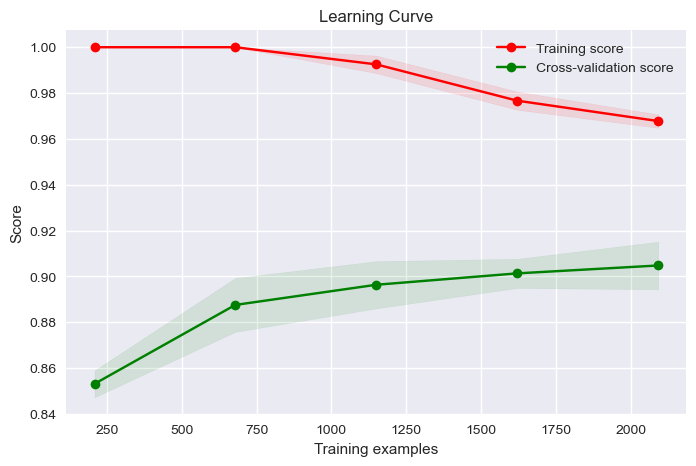

In [61]:
plt.figure(figsize=(8, 5))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Secara umum, interpretasi dari grafik ini adalah bahwa model berkinerja cukup baik dan semakin baik dalam menghadapi data yang beragam. Ini menunjukkan bahwa jika terus menambah data pelatihan, model akan terus mengembangkan kemampuannya untuk mengeneralisasi, yang sangat penting untuk aplikasi di dunia nyata.

**Save Model**

In [62]:
best_model = lgb_grid_2.best_estimator_
save_model = best_model.fit(X_train, y_train)
pickle.dump(save_model, open('model.pkl', 'wb'))

df_seen = pd.concat([X_train, y_train], axis=1)
df_seen.to_csv('data_seen.csv', index=False)

df_unseen = pd.concat([X_test, y_test], axis=1)
df_unseen.to_csv('data_unseen.csv', index=False)

[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.4s


## **5.6 Explainable Model**

Pada bagian ini, kita akan menjelaskan bagaimana model bekerja dan alasan yang mengarah pada output model untuk mengatasi masalah perusahaan.  

### **Model Explaination - LightGBM**

LightGBM, singkatan dari Light Gradient Boosting Machine, adalah algoritma machine learning yang menggunakan teknik gradient boosting untuk melakukan prediksi. Algoritma LightGBM dikenal karena kecepatan dan efisiensi yang tinggi dalam memproses dataset besar dengan menggunakan lebih sedikit memori dan waktu.

Algoritma LightGBM dengan prinsip boosting yang bekerja dengan menggabungkan beberapa model lemah (weak leaner) dengan memberikan bobot lebih tinggi untuk data yang terprediksi salah secara iterative. Dari proses iterative ini, model kemudian mentransform model lemah (weak learner) menjadi model yang lebih baik.

In [63]:
# Load Dataset
customer = pd.read_csv('data_ecommerce_customer_churn.csv')
customer.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [64]:
# Import Model
lgbm = pickle.load(open("model.pkl", 'rb'))

In [72]:
ohe_cols = list(lgbm[0].transformers_[0][1].get_feature_names_out())
impute_cols = list(lgbm[0].transformers_[1][1].get_feature_names_out())
remainder_cols = ['Complain']
cols = ohe_cols + impute_cols + remainder_cols

# Preprocessing
candidate_pre = lgbm.named_steps['Transformation'].transform(df) 

model = lgbm.named_steps['model'] 
features = cols 

shap_values = shap.TreeExplainer(model,
                                 data = candidate_pre,
                                 feature_perturbation="interventional",
                                 model_output="probability").shap_values(candidate_pre)


 98%|===================| 3216/3269 [00:39<00:00]        

### **Feature Importance & SHAP Summary Plot**

- Feature importance bertujuan untuk mengetahui fitur-fitur apa yang berperan dalam memprediksi churn pelanggan e-commerece.
- SHAP (SHapley Additive exPlanations) bertujuan untuk menginterpretasikan prediksi model dan output dari machine learning yang dibangun.

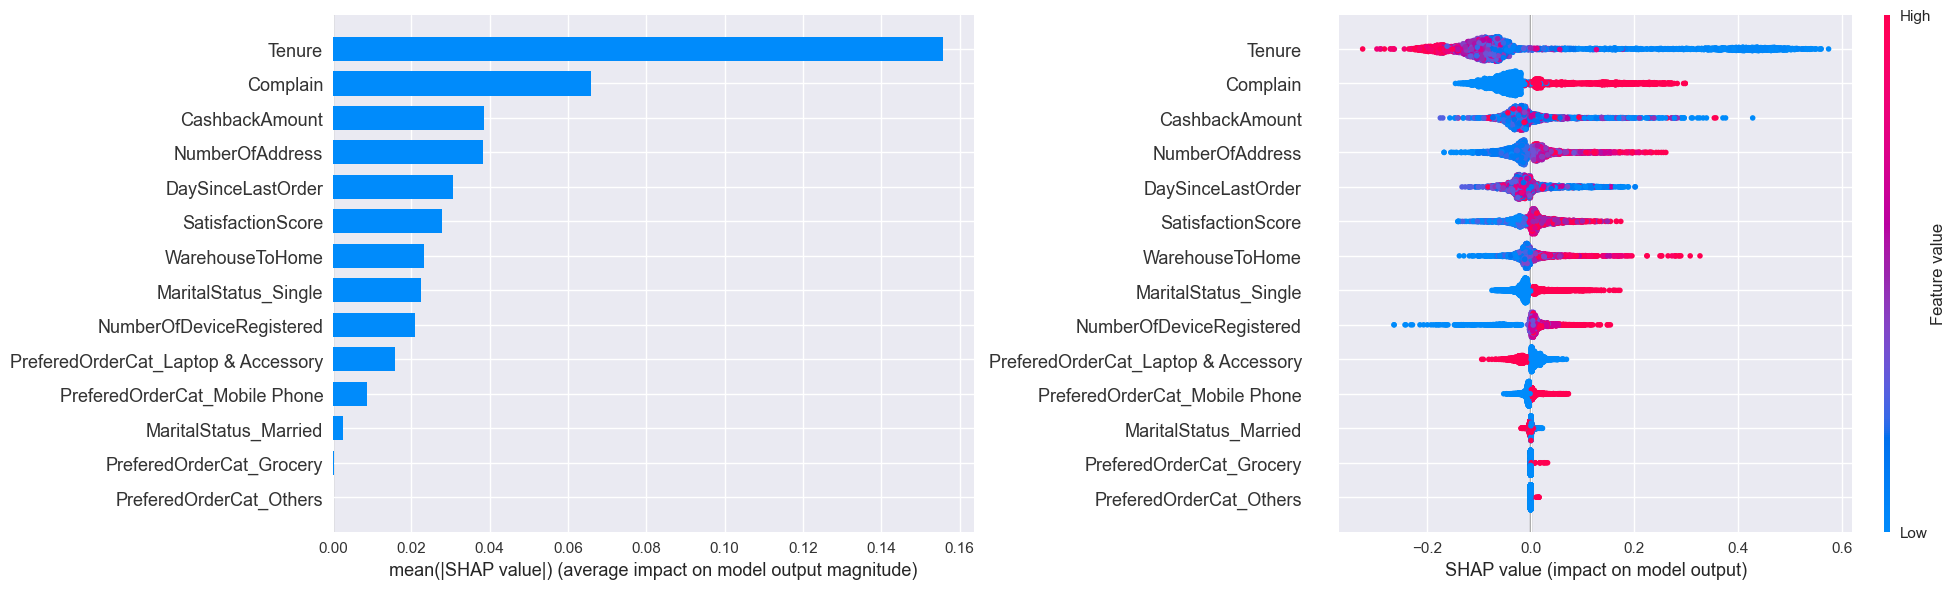

In [73]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
shap.summary_plot(shap_values, candidate_pre, feature_names = features,  title='Feature Importance', plot_type='bar', show=False, plot_size=None)
plt.subplot(1,2,2)
shap.summary_plot(shap_values, candidate_pre, feature_names = features,  title='SHAP Feature', show=False, plot_size=None)
plt.show()

> ### Insight
Pada Model LGBM ini, fitur **Tenure** dan **Complain** sangat berdampak pada terjadinya customer churn.
- Semakin kecil **Tenure**, semakin tinggi peluang customer untuk churn. Yang berarti ketika pelanggan baru saja join / menggunakan layanan adalah momen penting untuk mengetahui apakah pelanggan kedepannya akan churn atau tidak.
- Semakin tinggi nilai **Complain** (jika customer melakukan complain), maka dapat berdampak pada customer churn.


### **Customer paling berpotensi Churn**

Sebagai pembuktian lebih lanjut, kita tunjukkan bagaimana model bekerja dalam memprediksi salah satu data yang ada dalam dataset.

Berikut adalah 5 daftar pelanggan yang terdeteksi memiliki potensi Churn paling tinggi berdasarkan model yang kita miliki. 

In [74]:
pred_proba = lgbm.predict_proba(customer)

In [75]:
customer['Prediction(Prob->1)'] = pred_proba[:,1]
customer.sort_values(by='Prediction(Prob->1)', ascending=False).head(5)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,Prediction(Prob->1)
2244,1.0,9.0,5,Mobile Phone,3,Single,8,1,1.0,145.90,1,0.993216
1088,0.0,30.0,5,Mobile Phone,2,Single,2,1,0.0,111.18,1,0.992210
2800,0.0,30.0,5,Mobile Phone,1,Single,2,1,0.0,111.18,1,0.992210
148,1.0,20.0,5,Mobile Phone,5,Married,6,1,1.0,148.35,1,0.991954
487,1.0,17.0,5,Mobile Phone,5,Single,8,1,1.0,149.04,1,0.991410


> ### Insight
Dari 5 customer tersebut dapat dilihat paling berpotensi melakukan churn:

- memiliki probabilitas 99% melakukan Churn.
- memiliki Tenure 0 atau 1 
- melakukan Complain (1)

***
# **6. Conclusion & Recommendation**

Goals dari project ini adalah untuk memprediksi apakah customer E-Commerce X akan melakukan churn atau tidak. Dengan begitu, E-Commerce X dapat melakukan pendekatan dengan memberikan promo khusus kepada pelanggan yang ada untuk mencegah pelanggan melakukan churn. Disaat yang bersamaan, E-Commerce X juga memastikan agar promo tersebut diberikan kepada pelanggan yang tepat, yaitu pelanggan yang berpotensi churn. 

## **6.1 Conclusion**

Tujuan pembuatan model:
- Melakukan deteksi awal pelanggan yang akan Churn dan tidak Churn
- Melakukan usaha kepada pelanggan yang akan churn melalui pemberian promo/voucher. Disaat yang bersamaan tidak memberikan promo/voucher kepada pelanggan yang tidak akan churn.

Hasil pembuatan akhir model:

In [76]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       547
           1       0.72      0.85      0.78       107

    accuracy                           0.92       654
   macro avg       0.84      0.89      0.86       654
weighted avg       0.93      0.92      0.92       654



> ### Insight

- Berdasarkan recall, sebesar 85% model mampu memprediksi pelanggan yang berpotensi churn dan 93% pelanggan yang tidak churn.

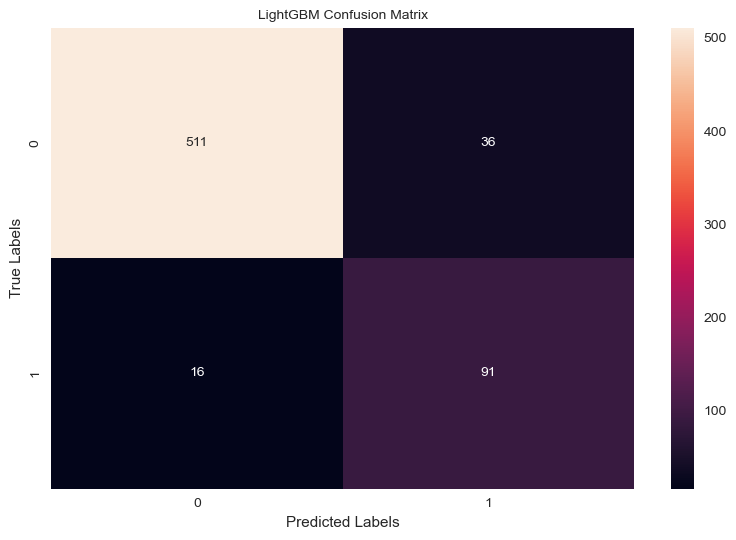

In [77]:
sns.heatmap(confusion_matrix(y_test, y_pred_test_tunned), annot=True, fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('LightGBM Confusion Matrix', size=10)
plt.tight_layout()
plt.show()

>### Insight

Dari 654 pelanggan yang dijadikan data test pada evaluasi model, model LightGBM yang dibangun mampu mengklasifikasikan sebanyak; 
- 511 pelanggan yang tidak Churn (True Negative)
- 91 pelanggan Churn (True Positive)
- Meski masih ada sekitar 52 orang terklasifikasi secara kurang tepat (False Positive & False Negative) 

Artinya model mampu mendeteksi sebesar 93% pelanggan secara tepat apakah mereka termasuk pelanggan yang akan Churn & Tidak Churn.

### **Manfaat ML bagi E-Commerce**

E-Commerce X tidak dapat mengetahui customer yang akan melakukan churn, sehingga E-Commerce X harus memberikan promosi ke semua customer, agar perusahaan tidak kehilangan customer. Ini menyebabkan perusahaan harus mengeluarkan biaya yang besar dalam mengimplentasikan strategi promosinya. 

Terdapat 654 pelanggan dalam data set. Asumsikan pemberian promo sebesar $10 per pelanggan. 

**Tanpa menggunakan machine learning**

Pemberian promo tanpa adanya model machine learning mengharuskan e-commerce perlu memberikan promo ke seluruh pelanggan.
- Biaya yang dibutuhkan 654 x $10 = **$6540** 

**Menggunakan Machine Learning**

Dengan adanya model machine learning ini, e-commerce dapat dengan lebih akurat memberikan promo terhadap orang yang berpotensi Churn saja. 
- Biaya yang dibutuhkan 
    - True Positive Churn customer: 91 x $10 = $910
  Kesalahan prediksi  
    - False Positive customer: 36 x $10 = $360
    - False Negative customer: 16 X $50 = $800 (biaya kerugian customer churn 5x)
    - Total: $910 + $360 + $800 = **$2070**

E-Commerce X hanya perlu mengeluarkan biaya senilai **$2070** untuk promo dalam usahanya menjaga pelanggan agar tidak churn. Hal ini dikarenakan E-Commerce X dapat dengan akurat mengetahui bahwa terdapat 511 pelanggan yang tidak berpotensi Churn, sehingga tidak perlu diberikan promo lagi.

Manfaat monetary yang didapatkan e-commerce dengan adanya model machine learning:
- $6540 - $2070 = $4470

E-commerce dapat menghemat sebesar **$4470** dari biaya yang perlu dikeluarkan untuk biaya promo.

### **Model limitation**

Model memprediksi pelanggan Churn terbatas pada rentang value dari tiap-tiap fitur:
- Tenure: 0-61 bulan
- Warehouse To Home: 5-127 km
- Number of Device Registered: 1-6 devices
- Number of Address: 1-22 address
- Day since last order: 0-46 hari
- Cashback Amount: 0-324.99

Jika ada value diluar dari rentang tersebut, model belum bisa menghitung pengaruhnya kepada prediksi Churn pelanggan.

## **6.2 Recommendation**

**For Business:**

- Pelanggan baru (khususnya dengan dengan masa **tenure** 0-1) berpotensi tinggi untuk churn. Maka E-Commerce dapat memberikan layanan yang maksimal serta promosi seperti cashback setiap pembelian sehingga pelanggan lebih tertarik untuk menggunakan platform e-commerce terus-menerus
- E-Commerce harus memperhatikan **complain** dari pelanggan. Walaupun memberikan nilai kepuasan yang tinggi, pelanggan yang complain tetap berpotensi churn. Maka dari itu setiap ada komplain, baik itu bukan masalah besar, tetap harus dilayani dan diatasi. 
- Gunakan machine learning yang telah dibuat untuk melihat customer yang berpotensi churn.  

**For Model:**

- Menambahkan lebih banyak data, khususnya pada kelompok churn.
- Menambahkan fitur-fitur lain dari interaksi pelanggan. Misal: waktu pengiriman barang., kepuasan customer service, dan sebagainya.
- Meningkatkan kualitas data seperti memastikan data tidak terduplikat, serta memastikan data yang didapat tidak ada missing value.